In [1]:
# import pandas, matplotlib and numpy
import pandas as pd
import numpy as np

In [2]:
# Read 50 startups data
df_startup = pd.read_csv('../../data-csv/csv-files/50_Startups.csv')
df_startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Read all the columns except the 'Profit' column to X
X = df_startup.iloc[:, :-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [4]:
# Read the 'Profit' column to y
y = df_startup.iloc[:, 4]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [5]:
# "State" is a categorical variable, lets use One Hot encoding 
# One hot encoding is a process by which categorical variables are converted into a form that could be 
# provided to ML algorithms to do a better job in prediction.
# Drop one column to avoid "DUMMY VARIABLE TRAP"
states = pd.get_dummies(X['State'], drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [6]:
# Drops the 'State' column from X
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [7]:
# Conacat "one-hot-encoded" values of State column to X (axis=1 means add column)
X = pd.concat([X, states], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [10]:
# Fitting Linear Regression to the dataset
#so that we can use it for comparision later
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly)
X_poly_df

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,1.0,165349.20,136897.80,471784.10,0.0,1.0,2.734036e+10,2.263594e+10,7.800912e+10,0.00,...,0.0,0.0,0.0,471784.10,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,162597.70,151377.59,443898.53,0.0,0.0,2.643801e+10,2.461365e+10,7.217688e+10,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,153441.51,101145.55,407934.54,1.0,0.0,2.354430e+10,1.551993e+10,6.259409e+10,153441.51,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,144372.41,118671.85,383199.62,0.0,1.0,2.084339e+10,1.713294e+10,5.532345e+10,0.00,...,0.0,0.0,0.0,383199.62,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,142107.34,91391.77,366168.42,1.0,0.0,2.019450e+10,1.298744e+10,5.203522e+10,142107.34,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,131876.90,99814.71,362861.36,0.0,1.0,1.739152e+10,1.316325e+10,4.785303e+10,0.00,...,0.0,0.0,0.0,362861.36,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,134615.46,147198.87,127716.82,0.0,0.0,1.812132e+10,1.981524e+10,1.719266e+10,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,130298.13,145530.06,323876.68,1.0,0.0,1.697760e+10,1.896229e+10,4.220053e+10,130298.13,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,120542.52,148718.95,311613.29,0.0,1.0,1.453050e+10,1.792696e+10,3.756265e+10,0.00,...,0.0,0.0,0.0,311613.29,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,123334.88,108679.17,304981.62,0.0,0.0,1.521149e+10,1.340393e+10,3.761487e+10,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Fit a polynominal regression
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

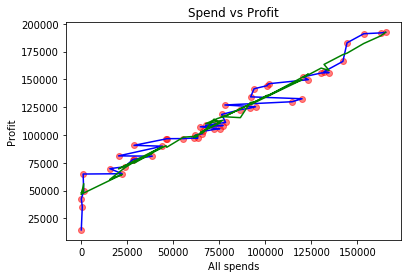

In [44]:
# Visualising the Training set results
import matplotlib.pyplot as plt

# Actual data
#plt.scatter(X_test, y_test, color = 'red', cmap='viridis', alpha=0.5)
plt.scatter(X['R&D Spend'], y, color = 'red', cmap='viridis', alpha=0.5)
#plt.scatter(X['Administration'], y, color = 'green', cmap='viridis', alpha=0.5)
#plt.scatter(X['Marketing Spend'], y, color = 'grey', cmap='viridis', alpha=0.5)

#Predicted data
plt.plot(X['R&D Spend'], poly_lin_reg.predict(X_poly), color = 'blue')
plt.plot(X['R&D Spend'], lin_reg.predict(X), color = 'green')

plt.title('Spend vs Profit')
plt.xlabel('All spends')
plt.ylabel('Profit')
plt.show()